In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y=make_classification(n_samples=1000,
                    n_features=2,
                    n_redundant=0,
                    n_clusters_per_class=1,
                    weights=[0.90],
                    random_state=42)

In [4]:
print(X)
print(Y)

[[ 1.0735459  -1.10133925]
 [ 0.75594526 -1.1723519 ]
 [ 1.35447877 -0.94852841]
 ...
 [-2.15090138 -2.98937226]
 [ 2.45164689 -0.1566294 ]
 [ 3.64147835  0.75692519]]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [5]:
import pandas as pd

In [6]:
df_features=pd.DataFrame(data=X,columns=["feature_1","feature_2"])
df_target=pd.DataFrame(data=Y,columns=["target"])

In [7]:
df_features

,feature_1,feature_2
0,1.073546,-1.101339
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,1.951888,-0.270157
...,...,...
995,1.713939,0.451639
996,1.509473,-0.794996
997,-2.150901,-2.989372
998,2.451647,-0.156629


In [8]:
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,0
997,0
998,0


In [9]:
final_df=pd.concat([df_features,df_target],axis=1)
final_df

,feature_1,feature_2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


In [10]:
final_df["target"].value_counts()

target
0    896
1    104
Name: count, dtype: int64

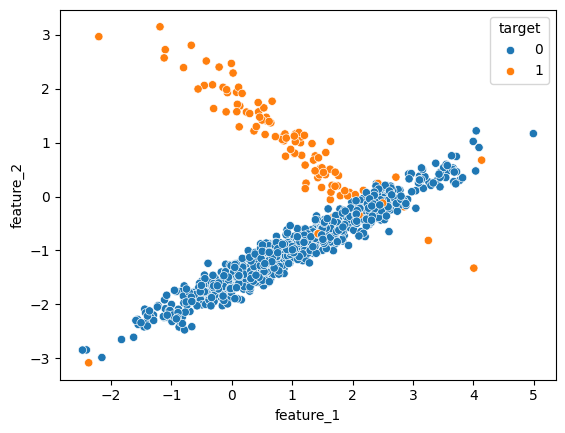

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=final_df,x="feature_1",y="feature_2",hue="target")
plt.show()

In [1]:
from imblearn.over_sampling import SMOTE

In [23]:
oversampling=SMOTE()

X,Y=oversampling.fit_resample(final_df[["feature_1","feature_2"]],final_df["target"])

In [34]:
X

,feature_1,feature_2
0,1.073546,-1.101339
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,1.951888,-0.270157
...,...,...
1787,2.110801,0.073121
1788,-0.456875,1.853900
1789,1.127149,0.772597
1790,1.071956,1.153251


In [35]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1787    1
1788    1
1789    1
1790    1
1791    1
Name: target, Length: 1792, dtype: int64

In [18]:
len(Y[Y==1])

896

In [19]:
len(Y[Y==0])

896

In [40]:
df_features=X.copy()
df_target=pd.DataFrame(Y,columns=["target"])
oversample_df=pd.concat([df_features,df_target],axis=1)

In [43]:
oversample_df

,feature_1,feature_2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
1787,2.110801,0.073121,1
1788,-0.456875,1.853900,1
1789,1.127149,0.772597,1
1790,1.071956,1.153251,1


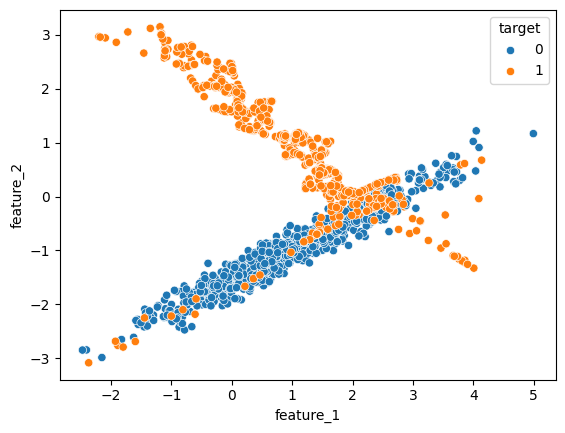

In [44]:
sns.scatterplot(data=oversample_df,x="feature_1",y="feature_2",hue="target")
plt.show()